<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/AstroDC/blob/main/Samples/Isochrone_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Uncomment and run the following cell if you are on Google Colab

In [ ]:
#!git clone https://github.com/Mahdi-Abdollahii/AstroDC.git

Cloning into 'AstroDC'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 296 (delta 64), reused 128 (delta 50), pack-reused 135
Receiving objects: 100% (296/296), 6.63 MiB | 10.42 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [ ]:
#!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-r39f10me
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-r39f10me
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit b6ca4881a7114b09cbdd8f46031f673a5fb3e755
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.4-py3-none-any.whl size=2573 sha256=1bf954987fe28412a3787a2e3fd2247fd58c7e75c81ffca457dc4a84d16e2674
  Stored in directory: /tmp/pip-ephem-wheel-cache-3jagdm3l/wheels/22/e9/d8/3e2ea76c885e9414f4915871d51adccd8aa853a81eaa9f492d
Successfully built AstroDC


Importing needed libraries

In [ ]:
from AstroDC import AstroDC 
import pandas as pd
import numpy as np
import csv
import matplotlib.pylab as plt 

Using AstroDC to change the type of data from XML+CSV to CSV

In [ ]:
AstroDC.Vizier_XMLCSV_to_CSV("/content/AstroDC/Data/vizier_votable_Ukirt_NGC6822.tsv","UKIRT_file")

UKIRT_file.csv file of this data saved in local directory.


In [ ]:
df_ukirt= pd.read_csv("UKIRT_file.csv")
df_ukirt

,_RAJ2000(deg),_DEJ2000(deg),RAJ2000(deg),DEJ2000(deg),JmagUKIRT(mag),e_JmagUKIRT(mag),HmagUKIRT(mag),e_HmagUKIRT(mag),KmagUKIRT(mag),e_KmagUKIRT(mag)
0,295.899750,-14.510397,295.899750,-14.510397,18.873,0.111,18.584,0.101,18.196,0.100
1,295.899750,-14.610637,295.899750,-14.610637,18.853,0.110,18.453,0.091,18.253,0.106
2,295.899750,-14.784898,295.899750,-14.784898,16.839,0.024,16.196,0.017,16.024,0.018
3,295.899750,-15.129128,295.899750,-15.129128,17.198,0.026,16.619,0.025,16.384,0.026
4,295.899780,-14.623633,295.899780,-14.623633,17.481,0.035,17.145,0.030,17.054,0.038
...,...,...,...,...,...,...,...,...,...,...
25843,296.568726,-14.955183,296.568726,-14.955183,15.879,0.010,15.518,0.009,15.475,0.012
25844,296.568756,-14.650425,296.568756,-14.650425,14.848,0.005,14.194,0.004,13.962,0.005
25845,296.568848,-14.714405,296.568848,-14.714405,18.644,0.091,18.012,0.081,17.687,0.072
25846,296.568848,-14.725469,296.568848,-14.725469,16.881,0.020,16.481,0.021,16.413,0.024


Plotting CMD of this data

In [ ]:
# NGC 6822 information

DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [ ]:
X = df_ukirt['JmagUKIRT(mag)'] - df_ukirt['KmagUKIRT(mag)']
Y = df_ukirt['KmagUKIRT(mag)']

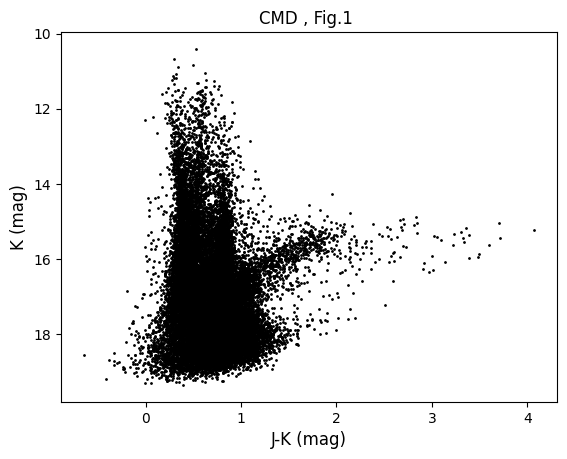

In [ ]:
plt.plot(X, Y,'k.' , markersize = 2)
plt.title("CMD , Fig.1 " ,fontsize = 12 )
plt.ylabel('K (mag)' , fontsize = 12 )
plt.xlabel('J-K (mag)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.show()

Adding Isochrones

Cleaning data and making csv file from that

In [ ]:
Iso_address = '/content/AstroDC/Data/ISO_01_01.dat'
Iso_file_name = 'ISO_01'
AstroDC.Stev_Isochrone_CSV( Iso_address , Iso_file_name )

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Wed Jan 25 23:38:44 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [ ]:
Iso_address = '/content/AstroDC/Data/ISO_01_1.dat'
Iso_file_name = 'ISO_1'
AstroDC.Stev_Isochrone_CSV( Iso_address , Iso_file_name )

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 11:57:57 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

Loading CVS file from local directory

In [ ]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.01,-0.17553,6.6,0.090000,1.081690,0.090,-1.585,3.4321,3.658,0,...,0.010000,8.733,15.392,14.740,13.448,11.542,9.309,6.926,6.279,5.913
1,0.01,-0.17553,6.6,0.091297,1.093999,0.091,-1.582,3.4325,3.663,0,...,0.010000,8.726,15.402,14.727,13.424,11.523,9.294,6.920,6.273,5.907
2,0.01,-0.17553,6.6,0.100000,1.171106,0.100,-1.565,3.4348,3.694,0,...,0.010000,8.683,15.490,14.660,13.278,11.411,9.205,6.883,6.240,5.876
3,0.01,-0.17553,6.6,0.109283,1.244281,0.109,-1.527,3.4394,3.713,0,...,0.010000,8.587,15.545,14.518,13.049,11.221,9.042,6.795,6.150,5.798
4,0.01,-0.17553,6.6,0.120116,1.320078,0.120,-1.505,3.4423,3.744,0,...,0.010000,8.534,15.693,14.457,12.894,11.095,8.934,6.749,6.104,5.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20655,0.01,-0.17553,10.1,0.935630,2.458368,0.683,3.335,3.5055,-0.089,7,...,0.011200,-3.568,4.274,3.075,1.495,-0.545,-2.723,-5.182,-6.218,-6.586
20656,0.01,-0.17553,10.1,0.935630,2.458368,0.672,3.361,3.5040,-0.127,7,...,0.011200,-3.632,4.263,3.111,1.543,-0.539,-2.744,-5.251,-6.287,-6.660
20657,0.01,-0.17553,10.1,0.935630,2.458368,0.664,3.368,3.5058,-0.133,7,...,0.011200,-3.650,4.237,3.019,1.423,-0.624,-2.806,-5.263,-6.298,-6.668
20658,0.01,-0.17553,10.1,0.935630,2.458368,0.661,3.369,3.5098,-0.120,7,...,0.011200,-3.653,4.187,2.825,1.174,-0.787,-2.913,-5.253,-6.284,-6.650


In [34]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.01,-0.17553,6.60,0.090000,1.081690,0.090,-1.585,3.4321,3.658,0,...,0.010000,8.733,15.392,14.740,13.448,11.542,9.309,6.926,6.279,5.913
1,0.01,-0.17553,6.60,0.091297,1.093999,0.091,-1.582,3.4325,3.663,0,...,0.010000,8.726,15.402,14.727,13.424,11.523,9.294,6.920,6.273,5.907
2,0.01,-0.17553,6.60,0.100000,1.171106,0.100,-1.565,3.4348,3.694,0,...,0.010000,8.683,15.490,14.660,13.278,11.411,9.205,6.883,6.240,5.876
3,0.01,-0.17553,6.60,0.109283,1.244281,0.109,-1.527,3.4394,3.713,0,...,0.010000,8.587,15.545,14.518,13.049,11.221,9.042,6.795,6.150,5.798
4,0.01,-0.17553,6.60,0.120116,1.320078,0.120,-1.505,3.4423,3.744,0,...,0.010000,8.534,15.693,14.457,12.894,11.095,8.934,6.749,6.104,5.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21223,0.01,-0.17553,10.05,0.966879,2.465708,0.683,3.084,3.5384,0.294,8,...,0.009833,-2.939,4.190,2.148,0.296,-1.121,-2.716,-4.444,-5.450,-5.757
21224,0.01,-0.17553,10.05,0.966880,2.465708,0.657,3.429,3.4896,-0.263,8,...,0.009833,-3.802,4.341,3.595,2.138,-0.210,-2.552,-5.468,-6.510,-6.904
21225,0.01,-0.17553,10.05,0.966881,2.465709,0.648,3.101,3.5382,0.254,8,...,0.009833,-2.981,4.188,2.131,0.269,-1.155,-2.755,-4.486,-5.491,-5.801
21226,0.01,-0.17553,10.05,0.966882,2.465709,0.621,3.444,3.4896,-0.302,8,...,0.009833,-3.840,4.365,3.608,2.139,-0.226,-2.574,-5.502,-6.545,-6.944


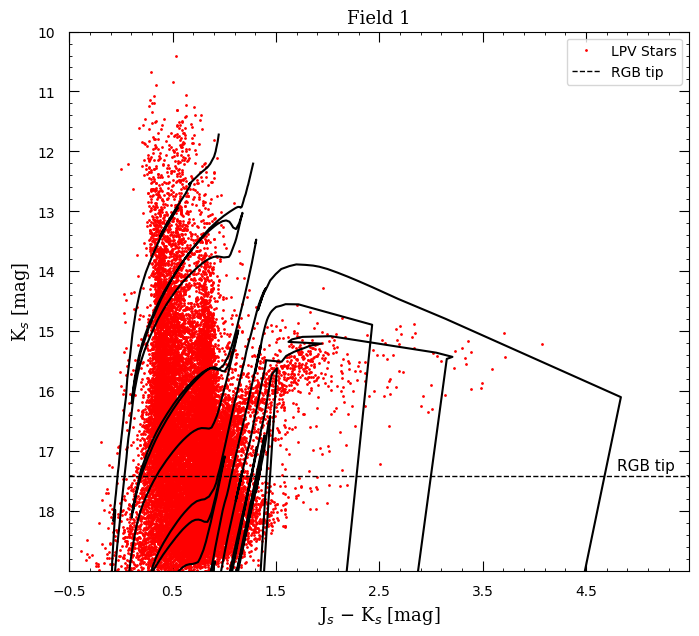

In [35]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')


#ISO
LOG_AGE_ALL = [6.8,7,7.5,8,8.5,9,9.5,10]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

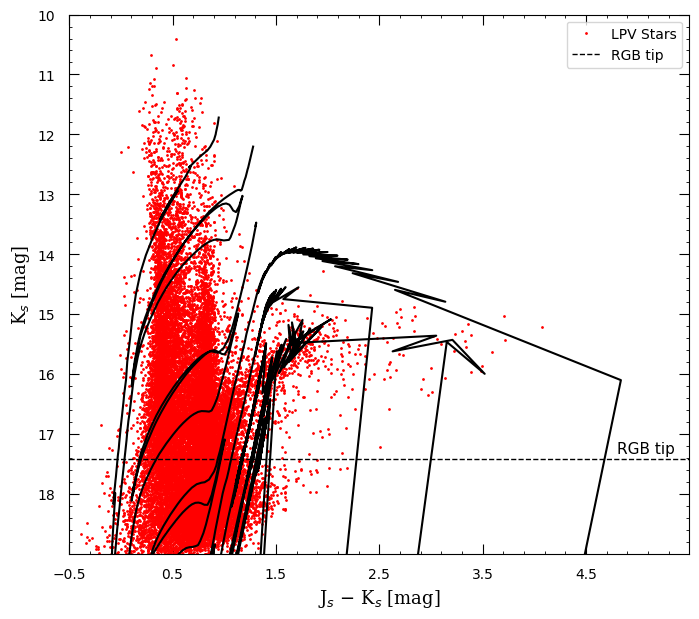

In [36]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')


#ISO
LOG_AGE_ALL = [6.8,7,7.5,8,8.5,9,9.5,10]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'])  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)